# probability 

In [50]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

In [51]:
xs = np.linspace(-5,10,2000)
ks = np.arange(50)

# Discrete Poisson distribution

0.09851840993941652
0.00022087848072126846


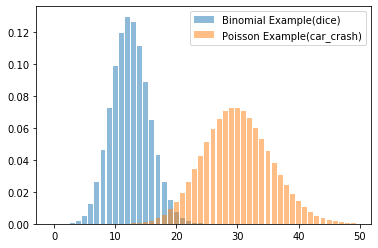

In [52]:
pmf_binom = st.binom.pmf(ks,50,0.25)
plt.bar(ks,pmf_binom, label = "Binomial Example(dice)",alpha = 0.5)

pmf_poisson = st.poisson.pmf(ks,30)
plt.bar(ks,pmf_poisson, label= "Poisson Example(car_crash)",alpha = 0.5)
plt.legend(),

print(st.binom.pmf(10,50,0.25))
print(st.poisson.pmf(50,30))

# Continuous Distribution

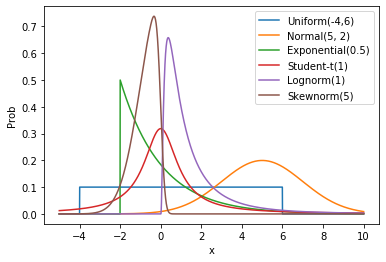

In [53]:
pdf_uniform = st.uniform.pdf(xs, -4, 10)
plt.plot(xs, pdf_uniform, label="Uniform(-4,6)")

pdf_normal = st.norm.pdf(xs, loc=5, scale=2)
plt.plot(xs, pdf_normal, label="Normal(5, 2)")

pdf_exponential = st.expon.pdf(xs, loc=-2, scale=2)
plt.plot(xs, pdf_exponential, label="Exponential(0.5)")

pdf_studentt = st.t.pdf(xs, 1)
plt.plot(xs, pdf_studentt, label="Student-t(1)")

pdf_lognorm = st.lognorm.pdf(xs, 1)
plt.plot(xs, pdf_lognorm, label="Lognorm(1)")

pdf_skewnorm = st.skewnorm.pdf(xs, -6)
plt.plot(xs, pdf_skewnorm, label="Skewnorm(5)")

plt.legend()
plt.ylabel("Prob")
plt.xlabel("x");

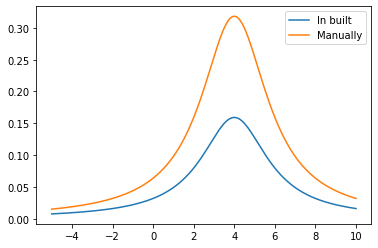

In [54]:
plt.plot(xs, st.t.pdf(xs, 1, loc=4, scale=2), label="In built")
plt.plot(xs, st.t.pdf((xs-4)/2, 1, loc=0, scale=1), label="Manually")
plt.legend();

# Empirical PDFs

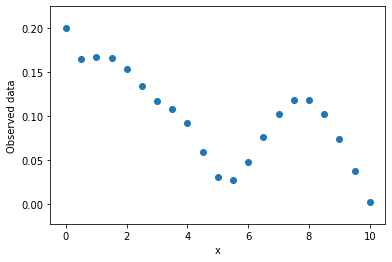

In [55]:
from scipy.interpolate import interp1d
xs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 
      5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
ys = [0.2, 0.165, 0.167, 0.166, 0.154, 0.134, 0.117, 
      0.108, 0.092, 0.06, 0.031, 0.028, 0.048, 0.077, 
      0.103, 0.119, 0.119, 0.103, 0.074, 0.038, 0.003]

plt.scatter(xs,ys)
plt.xlabel("x")
plt.ylabel("Observed data");

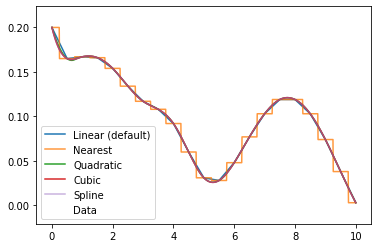

In [56]:
from scipy.interpolate import interp1d
x = np.linspace(min(xs), max(xs), 1000)
y1 = interp1d(xs, ys)(x)
y2 = interp1d(xs, ys, kind="nearest")(x)
y3 = interp1d(xs, ys, kind="quadratic")(x)
y4 = interp1d(xs, ys, kind="cubic")(x)

from scipy.interpolate import splev, splrep
y5 = splev(x, splrep(xs, ys))

plt.scatter(xs, ys, s=30, label="Data", c="w")
plt.plot(x, y1, label="Linear (default)")
plt.plot(x, y2, label="Nearest", alpha=0.8)
plt.plot(x, y3, label="Quadratic", ls='-')
plt.plot(x, y4, label="Cubic", ls='-')
plt.plot(x, y5, label="Spline", ls='-', alpha=1.5)
plt.legend();

In [57]:
from scipy.integrate import simps

def get_prob(xs, ys, a, b, resolution=1000):
    x_norm = np.linspace(min(xs), max(xs), resolution)
    y_norm = interp1d(xs, ys, kind="quadratic")(x_norm)
    normalisation = simps(y_norm, x=x_norm)
    x_vals = np.linspace(a, b, resolution)
    y_vals = interp1d(xs, ys, kind="quadratic")(x_vals)
    return simps(y_vals, x=x_vals) / normalisation

def get_cdf(xs, ys, v):
    return get_prob(xs, ys, min(xs), v)

def get_sf(xs, ys, v):
    return 1 - get_cdf(xs, ys, v)

print(get_prob(xs, ys, 0, 10))

1.0


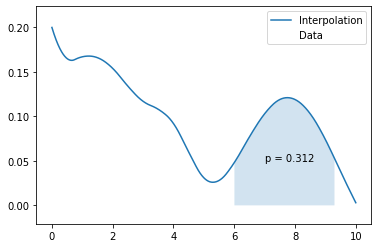

In [58]:
v1,v2 = 6,9.3
area = get_prob(xs,ys,v1,v2)
plt.scatter(xs, ys, s=30, label="Data", color="w")
plt.plot(x, y3, linestyle="-", label="Interpolation")
plt.fill_between(x, 0, y3, where=(x>=v1)&(x<=v2), alpha=0.2)
plt.annotate(f"p = {area:.3f}", (7, 0.05))
plt.legend();

D:\anaconda\lib\site-packages\scipy\integrate\quadrature.py:376: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
D:\anaconda\lib\site-packages\scipy\integrate\quadrature.py:378: RuntimeWarning: invalid value encountered in true_divide
  y[slice1]*hsum*hsum/hprod +


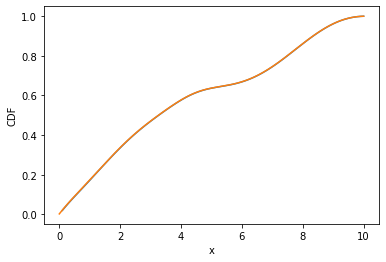

In [59]:
x_new = np.linspace(min(xs), max(xs), 100)
cdf_new = [get_cdf(xs, ys, i) for i in x_new]
cheap_cdf = y3.cumsum() / y3.sum()

plt.plot(x_new, cdf_new, label="Interpolated CDF")
plt.plot(x, cheap_cdf, label="Super cheap CDF for specific cases")
plt.ylabel("CDF")
plt.xlabel("x");

# SAMPLING DISTRIBUTION

In [60]:
from scipy.stats import norm, uniform
from scipy.integrate import simps
import numpy as np
import matplotlib.pyplot as plt

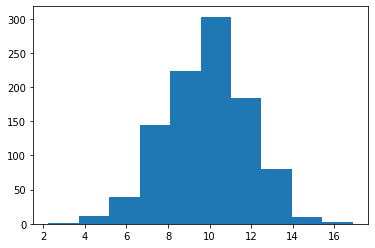

In [61]:
plt.hist(norm.rvs(loc= 10,scale= 2, size=1000));

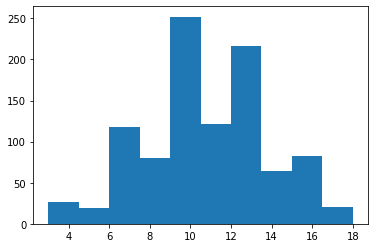

In [68]:
samples = np.ceil(uniform.rvs(loc = 0,scale = 6, size= (1000,3))).sum(axis= 1)

plt.hist(samples);

# Rejection sampling

(0, 2)

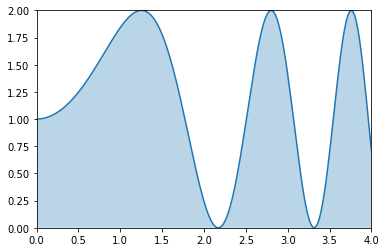

In [70]:
def pdf(x):
    return np.sin(x**2)+1
xs= np.linspace(0,4,200)
ps =pdf(xs)

plt.plot(xs,ps)
plt.fill_between(xs,0,ps,alpha = 0.3)
plt.xlim(0,4)
plt.ylim(0,2)


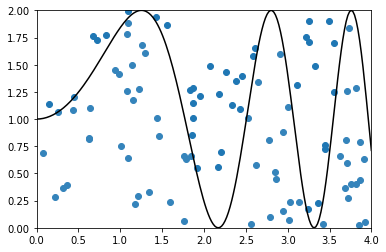

In [71]:
n = 100
random_x = uniform.rvs(loc=0,scale= 4,size =n)
random_y = uniform.rvs(loc= 0,scale= 2,size = n)
plt.scatter(random_x, random_y)
plt.plot(xs, ps, c="k")
plt.fill_between(xs, 0, ps, color="w", alpha=0.1)
plt.xlim(0, 4), plt.ylim(0, 2);

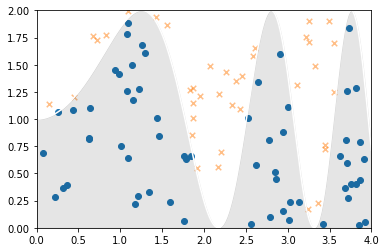

In [73]:
passed = random_y <= pdf(random_x)
plt.scatter(random_x[passed], random_y[passed])
plt.scatter(random_x[~passed], random_y[~passed], marker="x", s=30, alpha=0.5)
plt.plot(xs, ps, c="w")
plt.fill_between(xs, 0, ps, color="k", alpha=0.1)
plt.xlim(0, 4), plt.ylim(0, 2);

59447


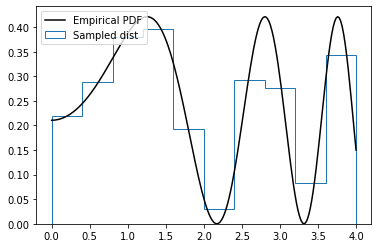

In [77]:
n2 = 100000
x_test = uniform.rvs(scale = 4,size = n2)
x_final = x_test[uniform.rvs(scale= 2,size= n2)<= pdf(x_test)]
print(len(x_final))
from scipy.integrate import simps
plt.hist(x_final, density=True, histtype="step", label="Sampled dist")
plt.plot(xs, ps / simps(ps, x=xs), c="k", label="Empirical PDF")
plt.legend(loc=2);

# INVERSION SAMPLING 

In [78]:
def pdf(x):
    return 3*x**2
def cdf(x):
    return x**3
def icdf(cdf):
    return cdf**(1/3)

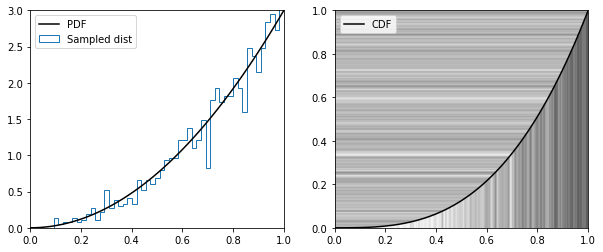

In [82]:
xs = np.linspace(0, 1, 100)
pdfs = pdf(xs)
cdfs = cdf(xs)
n = 2000
u_samps = uniform.rvs(size=n)
x_samps = icdf(u_samps)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
axes[0].plot(xs, pdfs, color="k", label="PDF")
axes[0].hist(x_samps, density=True, histtype="step", label="Sampled dist", bins=50)
axes[1].plot(xs, cdfs, color="k", label="CDF")
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha=0.3)
axes[1].vlines(x_samps, 0, u_samps, linewidth=0.1, alpha=0.3)
axes[0].legend(), axes[1].legend()
axes[1].set_xlim(0, 1), axes[1].set_ylim(0, 1);
axes[0].set_xlim(0, 1), axes[0].set_ylim(0, 3);

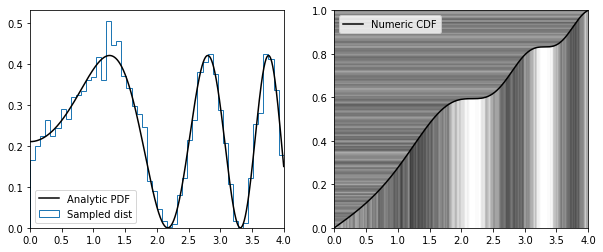

In [85]:
from scipy.interpolate import interp1d

def pdf(x):
    return np.sin(x**2) + 1
xs = np.linspace(0, 4, 10000)
pdfs = pdf(xs)
cdfs = pdfs.cumsum() / pdfs.sum()  # Dangerous

u_samps = uniform.rvs(size=4000)
x_samps = interp1d(cdfs, xs)(u_samps)

fig, axes = plt.subplots(ncols=2, figsize=(10,4))
axes[0].hist(x_samps, density=True, histtype="step", label="Sampled dist", bins=50)
axes[0].plot(xs, pdfs/4.747, color="k", label="Analytic PDF")
axes[0].legend(loc=3), axes[0].set_xlim(0, 4)
axes[1].plot(xs, cdfs, color="k", label="Numeric CDF")
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha=0.3)
axes[1].vlines(x_samps, 0, u_samps, linewidth=0.1, alpha=0.3)
axes[1].legend(loc=2), axes[1].set_xlim(0, 4), axes[1].set_ylim(0, 1);